In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [42]:
cifras_imputadas = pd.read_csv('cifras_imputadas.csv')

## ¿Qué países con TLC con Guatemala han mantenido aranceles máximos (AHS MaxRate) consistentemente bajos en los últimos 10 años?

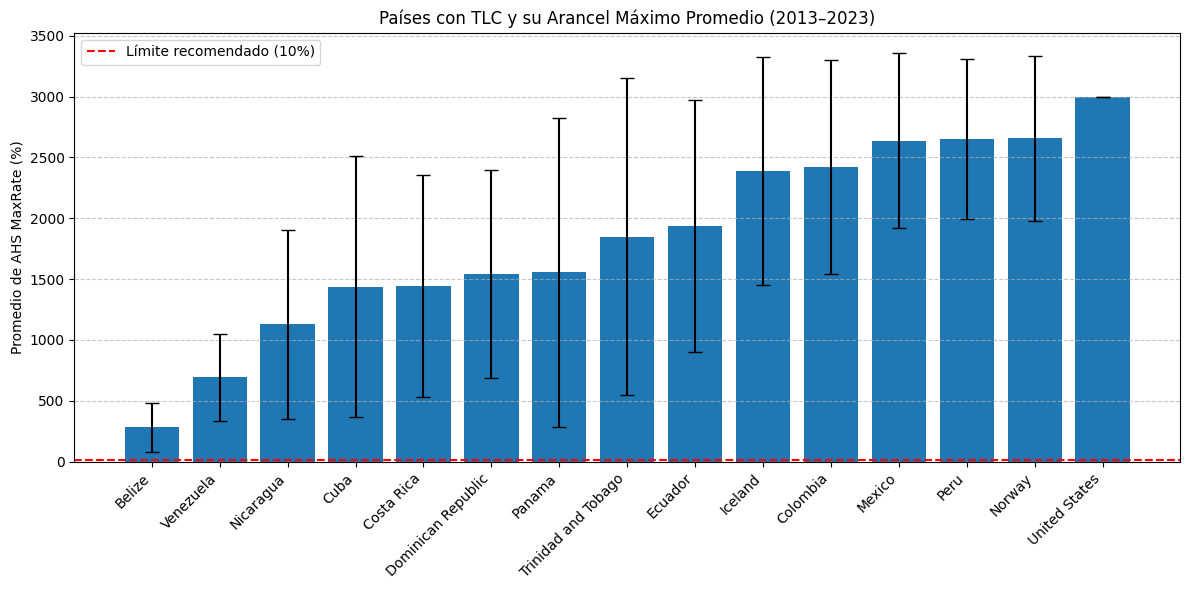

In [44]:

cifras['TLC_Con_GT'] = cifras['Partner Name'].isin(TLC).astype(int)

# Filtrar los datos para los últimos 10 años
cifras_reciente = cifras[cifras['Year'] >= 2013]

# Filtrar solo países con TLC
cifras_tlc = cifras_reciente[cifras_reciente['TLC_Con_GT'] == 1]

# Agrupar por país y calcular estadística de arancel máximo
tlc_stats = cifras_tlc.groupby('Partner Name')['AHS MaxRate (%)'].agg(['mean', 'std']).sort_values(by='mean')

# Visualización
plt.figure(figsize=(12, 6))
plt.bar(tlc_stats.index, tlc_stats['mean'], yerr=tlc_stats['std'], capsize=5)
plt.axhline(10, color='red', linestyle='--', label='Límite recomendado (10%)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Promedio de AHS MaxRate (%)')
plt.title('Países con TLC y su Arancel Máximo Promedio (2013–2023)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## ¿Existe una relación entre el crecimiento económico de un país (Country Growth (%)) y su volumen de importaciones de productos guatemaltecos (Import (US$ Thousand))?

Coeficiente de correlación: -0.1093


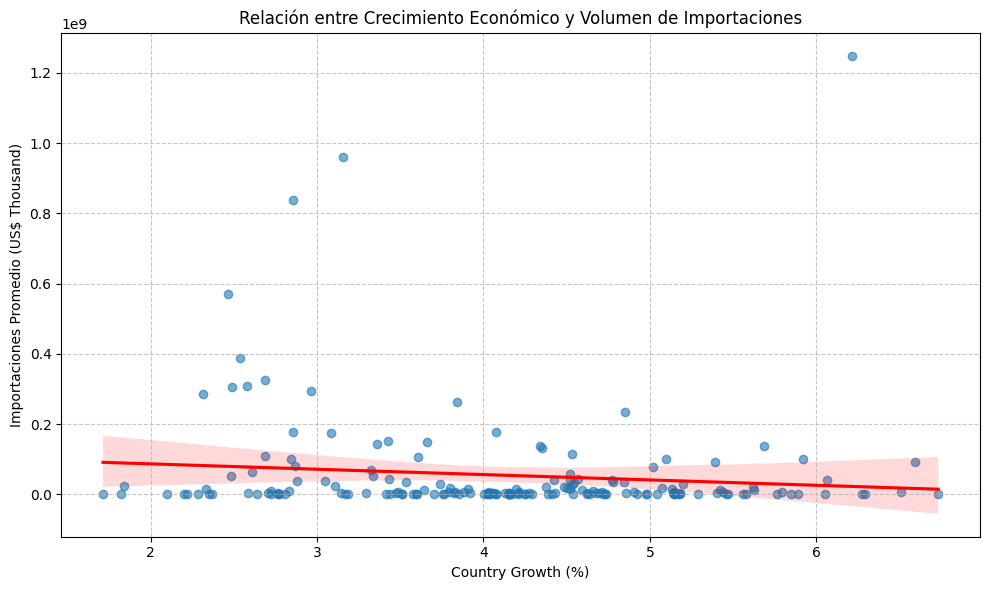

In [45]:
# Agrupar por país y calcular promedio de Importaciones y Crecimiento Económico
growth_vs_import = cifras.groupby('Partner Name')[['Import (US$ Thousand)', 'Country Growth (%)']].mean().dropna()

# Calcular correlación
correlacion = growth_vs_import['Import (US$ Thousand)'].corr(growth_vs_import['Country Growth (%)'])
print(f"Coeficiente de correlación: {correlacion:.4f}")

# Visualización con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    data=growth_vs_import,
    x='Country Growth (%)',
    y='Import (US$ Thousand)',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Relación entre Crecimiento Económico y Volumen de Importaciones')
plt.xlabel('Country Growth (%)')
plt.ylabel('Importaciones Promedio (US$ Thousand)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra la relación entre el crecimiento económico promedio de cada país y su volumen promedio de importaciones desde 1989. El coeficiente de correlación obtenido indica si existe una relación lineal entre estas variables. Un valor positivo sugiere que países con mayor crecimiento tienden a importar más, lo cual es un indicador favorable para Guatemala al buscar mercados dinámicos. Sin embargo, la correlación no implica causalidad directa, por lo que debe interpretarse con cautela.

##  ¿Qué continentes presentan el mejor balance entre bajo arancel promedio (AHS Simple Average (%)) y crecimiento económico (Country Growth (%)) para exportaciones guatemaltecas?

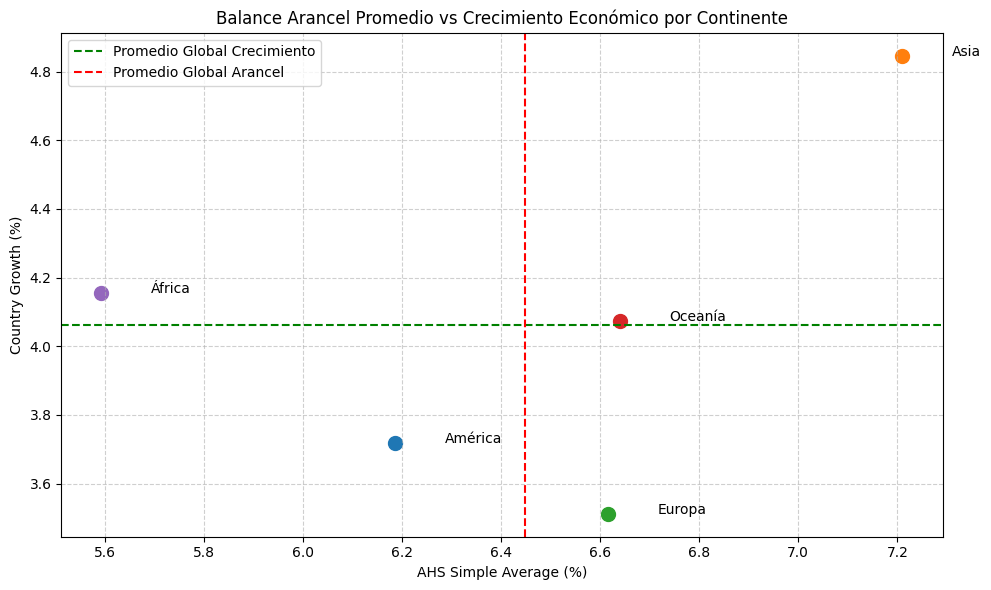

In [46]:
# Agrupación por continente con promedios
continente_stats = cifras.groupby('Continente')[['AHS Simple Average (%)', 'Country Growth (%)']].mean().dropna()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
for i in range(len(continente_stats)):
    x = continente_stats['AHS Simple Average (%)'].iloc[i]
    y = continente_stats['Country Growth (%)'].iloc[i]
    label = continente_stats.index[i]
    plt.scatter(x, y, s=100)
    plt.text(x + 0.1, y, label, fontsize=10)

# Líneas de referencia
plt.axhline(y=continente_stats['Country Growth (%)'].mean(), color='green', linestyle='--', label='Promedio Global Crecimiento')
plt.axvline(x=continente_stats['AHS Simple Average (%)'].mean(), color='red', linestyle='--', label='Promedio Global Arancel')

plt.xlabel('AHS Simple Average (%)')
plt.ylabel('Country Growth (%)')
plt.title('Balance Arancel Promedio vs Crecimiento Económico por Continente')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Este gráfico compara el arancel promedio y el crecimiento económico de cada continente. Los cuadrantes ayudan a visualizar qué regiones presentan condiciones más favorables para exportaciones guatemaltecas:


Cuadrante inferior derecho: ideal (bajo arancel, alto crecimiento).


Cuadrante superior derecho: alto crecimiento pero también barreras.


Cuadrante inferior izquierdo: condiciones estables.

Estos datos pueden ayudar a AGEXPORT a priorizar regiones antes de decidir sobre países individuales.